In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


# Demographic data
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m5_survey_data_demographics.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01
# Technology data    
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m5_survey_data_technologies_normalised.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01
# Salaray data
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html

demos = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m5_survey_data_demographics.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01')
techs = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m5_survey_data_technologies_normalised.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01')
salary = pd.read_html('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html')

--2021-09-14 02:36:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2170 (2.1K) [text/html]
Saving to: ‘Programming_Languages.html’

Programming_Languag 100%[===================>]   2.12K  --.-KB/s    in 0s      

2021-09-14 02:36:32 (42.2 MB/s) - ‘Programming_Languages.html’ saved [2170/2170]



In [4]:
# Top 5 currently used languages
toptechs = techs.groupby(['LanguageWorkedWith'])['Respondent'].count().to_frame()
toptechs.columns = ['Respondents']
t5 = toptechs.sort_values(by='Respondents', ascending=False).reset_index().head(5).copy()

# Top 5 future languages
futuretechs = techs.groupby(['LanguageDesireNextYear'])['Respondent'].count().to_frame()
futuretechs.columns = ['Respondents']
ft5 = futuretechs.sort_values(by='Respondents', ascending=False).reset_index().head(5).copy()

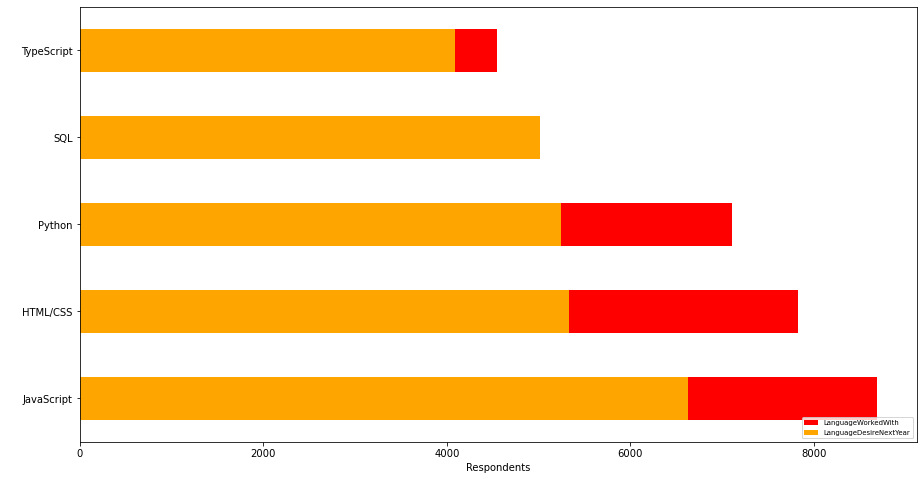

In [5]:
# Create chart with popular present and future languages
pax = t5.plot(kind='barh', x='LanguageWorkedWith', y='Respondents', figsize=(15, 8), color='red', stacked=False, grid=True)
fax = ft5.plot(kind='barh', x='LanguageDesireNextYear', y='Respondents', ax=pax, color='orange', stacked=False)

pax.set_xlabel('Respondents')
pax.set_ylabel(' ')
pax.legend(['LanguageWorkedWith', 'LanguageDesireNextYear'], loc='lower right', fontsize='x-small')

Text(0.5, 0, 'Respondents')

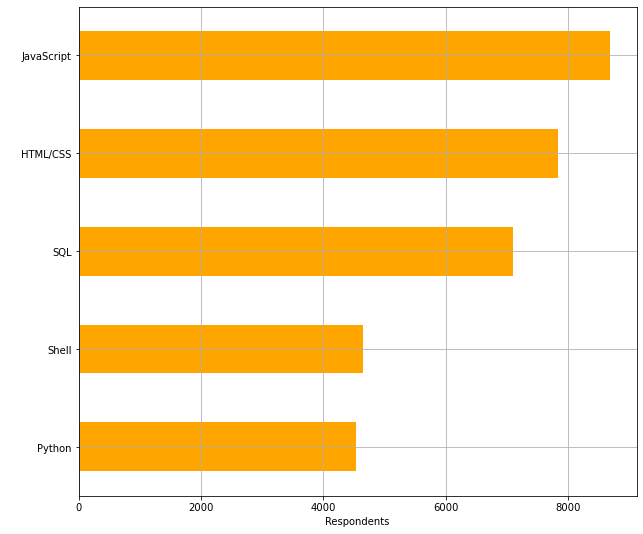

In [6]:
# LanguageWorkedWith plot
t5.sort_values(by='Respondents', ascending=True, inplace=True)
t5.replace(to_replace={'Bash/Shell/PowerShell': 'Shell'}, inplace=True)
t5.plot(kind='barh', y='Respondents', x='LanguageWorkedWith', figsize=(10, 9), legend=False, color='orange', grid=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}
matplotlib.rc('font', **font)
plt.ylabel(' ')
plt.xlabel('Respondents')

Text(0.5, 0, 'Respondents')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


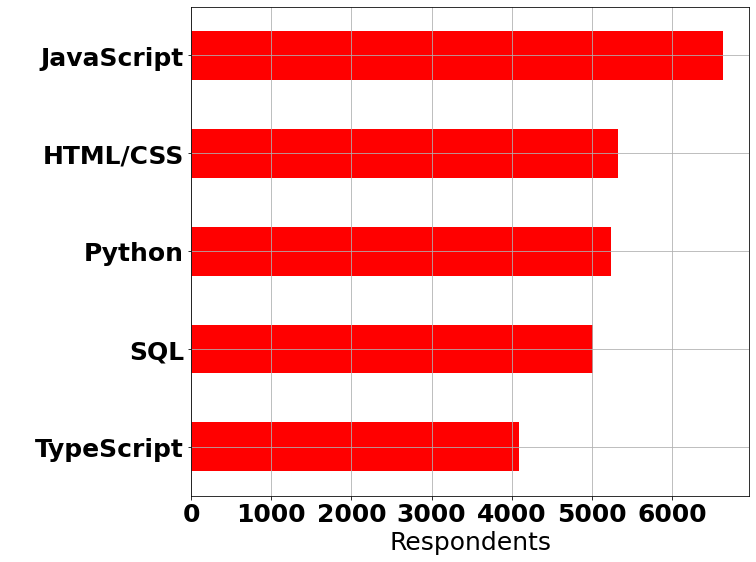

In [7]:
#LanguageDesireNextYear plot
ft5.sort_values(by='Respondents', ascending=True, inplace=True)
ft5.plot(kind='barh', y='Respondents', x='LanguageDesireNextYear', figsize=(10, 9), legend=False, color='red', grid=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}
matplotlib.rc('font', **font)
plt.ylabel(' ')
plt.xlabel('Respondents')

In [8]:
# Get salary info
saldf = salary[0].copy()
saldf.columns = [i for i in saldf.iloc[0, :]]
saldf.drop(index=0, columns=['No.', 'Created By', 'Learning Difficulty'], inplace=True)
saldf['Average Annual Salary'] = [float(i.replace('$', '').replace(',', '')) for i in saldf['Average Annual Salary']]
saldf.sort_values(by='Average Annual Salary', ascending=False, inplace=True)
saldf.index = range(1, len(saldf) + 1, 1)
saldf

,Language,Average Annual Salary
1,Swift,130801.0
2,Python,114383.0
3,C++,113865.0
4,Javascript,110981.0
5,Java,101013.0
6,Go,94082.0
7,R,92037.0
8,C#,88726.0
9,SQL,84793.0
10,PHP,84727.0


<AxesSubplot:>

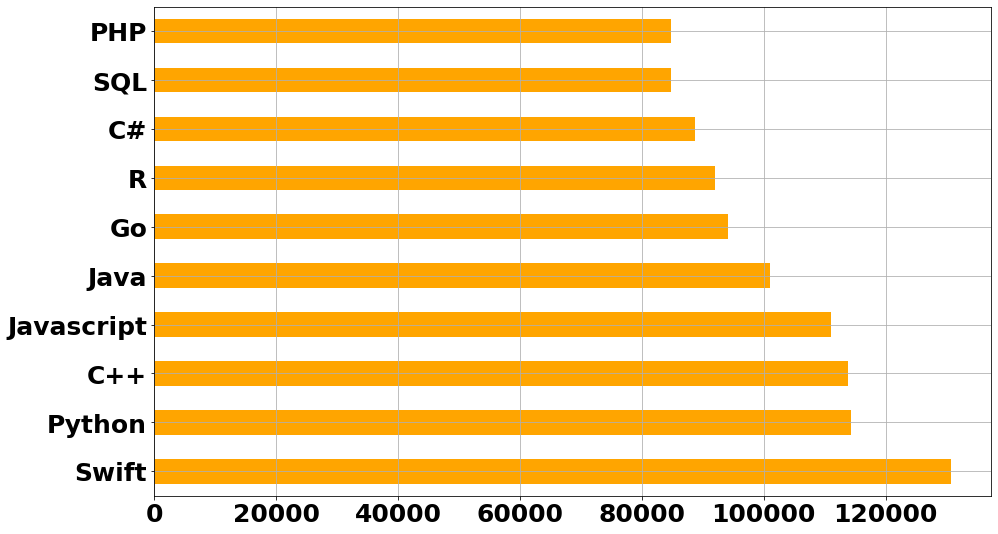

In [9]:
saldf.index = [i for i in saldf['Language'].copy()]
saldf.plot(kind='barh', figsize=(15,9), legend=False, color='orange', grid=True)

In [10]:
# Who's interested in learning JavaScript?
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
import sqlite3

conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

--2021-09-14 02:36:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  42.9MB/s    in 0.8s    

2021-09-14 02:36:37 (42.9 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



In [11]:
initialquery = '''
               SELECT Respondent, DevType
               FROM DevType
               WHERE Respondent = 151
               '''
initialdf = pd.read_sql_query(initialquery, conn)
initialdf.head(20)

,Respondent,DevType
0,151,"Developer, back-end"
1,151,"Developer, desktop or enterprise applications"
2,151,"Developer, embedded applications or devices"
3,151,"Developer, mobile"
4,151,DevOps specialist


In [12]:
jsquery = '''
          SELECT d.DevType, COUNT(d.Respondent) AS 'Wants to Learn JS'
          FROM DevType as d, LanguageDesireNextYear as l
          WHERE d.Respondent = l.Respondent
          AND LanguageDesireNextYear = 'JavaScript'
          GROUP BY d.DevType;
          '''
jsdf = pd.read_sql_query(jsquery, conn)
jsdf.head(30)

,DevType,Wants to Learn JS
0,Academic researcher,297
1,Data or business analyst,470
2,Data scientist or machine learning specialist,339
3,Database administrator,870
4,Designer,657
5,DevOps specialist,912
6,"Developer, QA or test",569
7,"Developer, back-end",3537
8,"Developer, desktop or enterprise applications",1429
9,"Developer, embedded applications or devices",433


<AxesSubplot:>

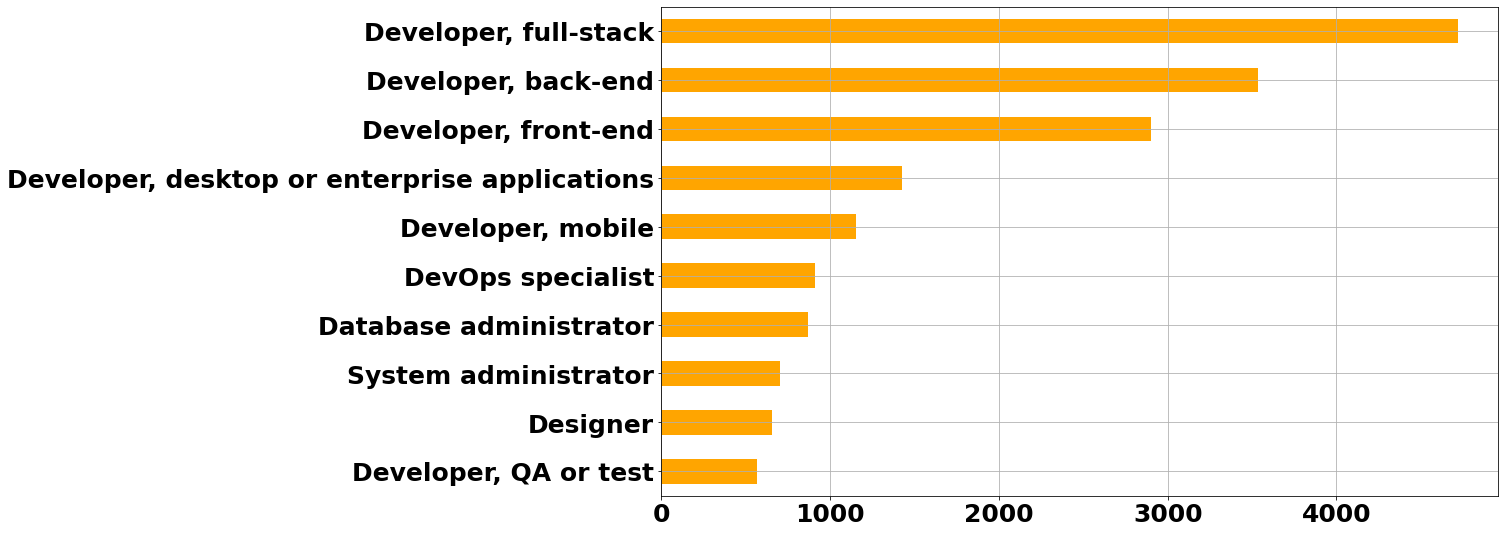

In [13]:
jsdf.sort_values(by='Wants to Learn JS', inplace=True, ascending=True)
jsdf.index = [i for i in jsdf['DevType']]
jsdf.tail(10).plot(kind='barh', color='orange', figsize=(15, 9), legend=False, grid=True)

In [14]:
# Top 5 currently used databases
topdata = techs.groupby(['DatabaseWorkedWith'])['Respondent'].count().to_frame()
topdata.columns = ['Respondents']
d5 = topdata.sort_values(by='Respondents', ascending=False).reset_index().head(5).copy()

# Top 5 future databases
futuredata = techs.groupby(['DatabaseDesireNextYear'])['Respondent'].count().to_frame()
futuredata.columns = ['Respondents']
fd5 = futuredata.sort_values(by='Respondents', ascending=False).reset_index().head(5).copy()

Text(0.5, 0, 'Respondents')

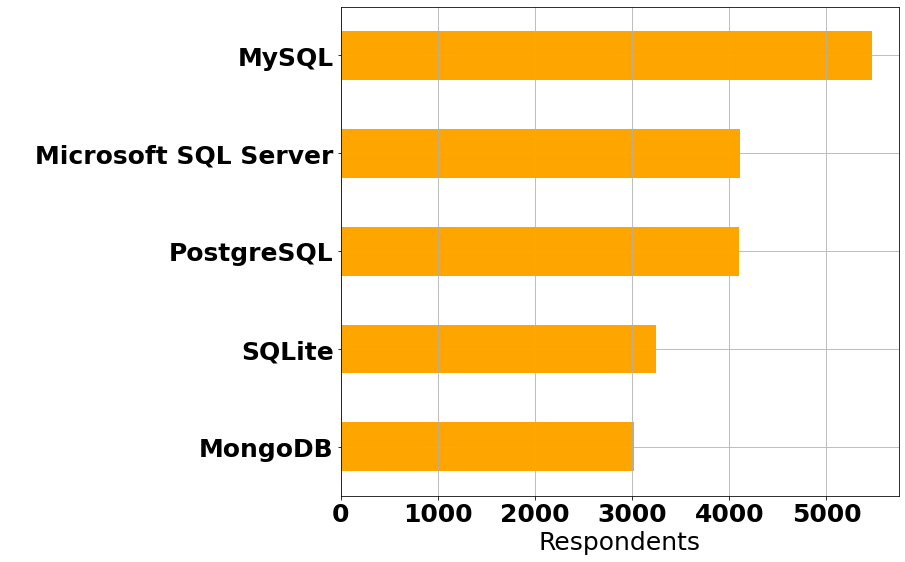

In [15]:
# DatabaseWorkedWith plot
d5.sort_values(by='Respondents', ascending=True, inplace=True)
d5.plot(kind='barh', y='Respondents', x='DatabaseWorkedWith', figsize=(10, 9), legend=False, color='orange', grid=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}
matplotlib.rc('font', **font)
plt.ylabel(' ')
plt.xlabel('Respondents')

Text(0.5, 0, 'Respondents')

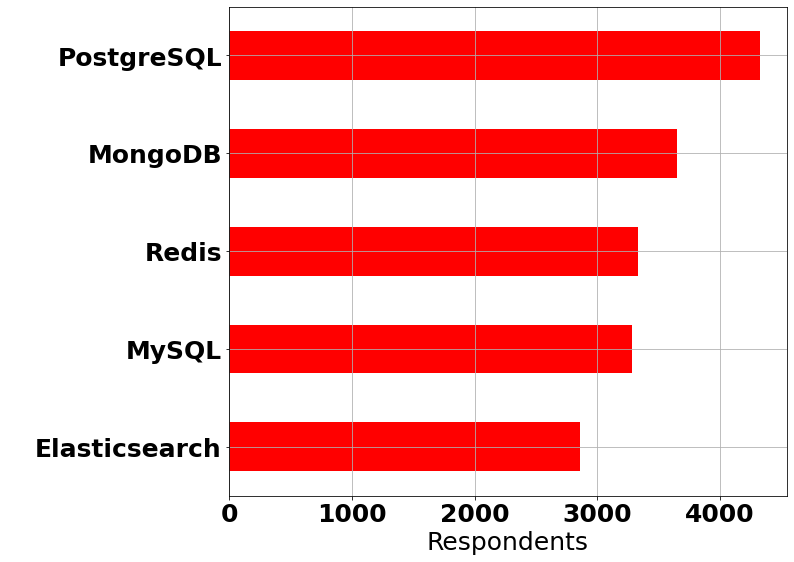

In [16]:
# DatabaseDesireNextYear plot
fd5.sort_values(by='Respondents', ascending=True, inplace=True)
fd5.plot(kind='barh', y='Respondents', x='DatabaseDesireNextYear', figsize=(10, 9), legend=False, color='red', grid=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}
matplotlib.rc('font', **font)
plt.ylabel(' ')
plt.xlabel('Respondents')

<AxesSubplot:>

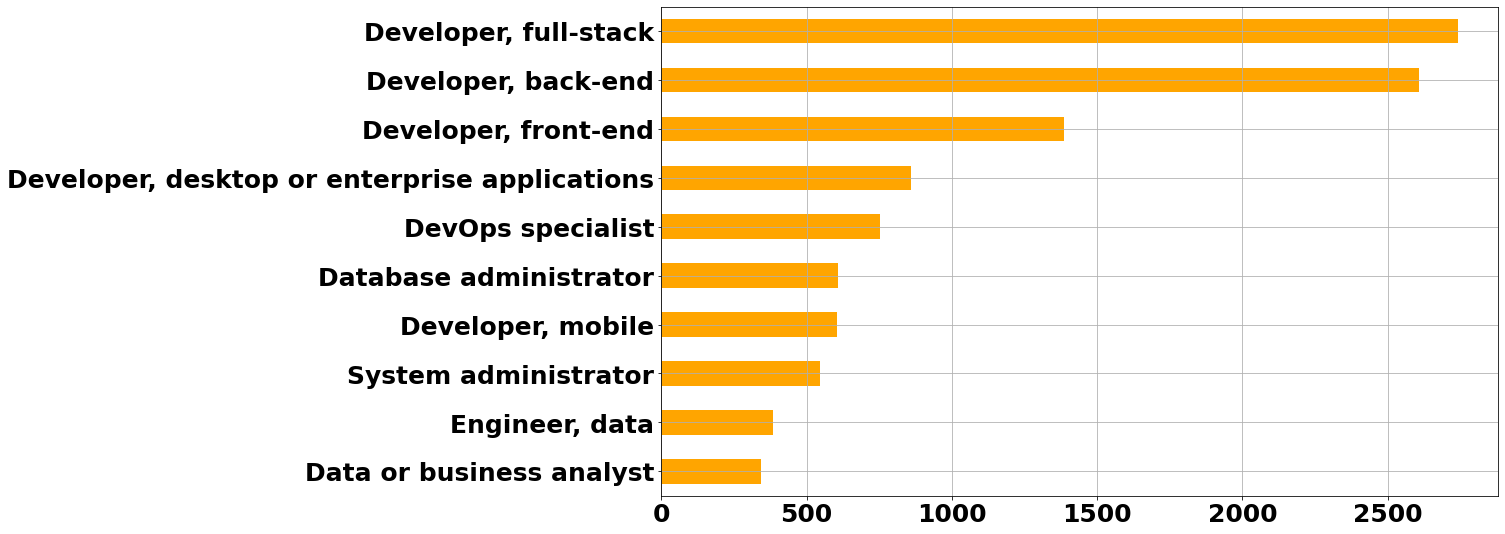

In [17]:
# Number of MySQL learners by profession (optional)
postquery = '''
          SELECT d.DevType, COUNT(d.Respondent) AS 'Wants to Learn PostgreSQL'
          FROM DevType as d, DatabaseDesireNextYear as l
          WHERE d.Respondent = l.Respondent
          AND DatabaseDesireNextYear = 'PostgreSQL'
          GROUP BY d.DevType;
          '''
postdf = pd.read_sql_query(postquery, conn)
postdf.sort_values(by='Wants to Learn PostgreSQL', inplace=True, ascending=True)
postdf.index = [i for i in postdf['DevType']]
postdf.tail(10).plot(kind='barh', color='orange', figsize=(15, 9), legend=False, grid=True)

In [40]:
# Popularity of PostgreSQL among developers who are neither full-stack nor back-end
postquery = '''
          SELECT d.Respondent, d.DevType
          FROM DevType d, DatabaseDesireNextYear l
          WHERE d.Respondent = l.Respondent
          AND l.DatabaseDesireNextyear = 'PostgreSQL'
          AND NOT EXISTS(SELECT *
                         FROM DevType y
                         WHERE DevType = 'Developer, back-end'
                         AND y.Respondent = d.Respondent);
          '''
postdf = pd.read_sql_query(postquery, conn)
postdf.head(20)

,Respondent,DevType
0,29,"Developer, front-end"
1,29,Educator
2,32,"Developer, full-stack"
3,53,DevOps specialist
4,53,"Developer, full-stack"
5,53,"Engineer, site reliability"
6,53,Student
7,53,System administrator
8,90,"Developer, front-end"
9,90,"Developer, full-stack"


In [41]:
conn.close()